## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = mouse_metadata_df.merge(study_results_df, on = 'Mouse ID')
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice.
total_mice = mouse_study_df.groupby("Mouse ID")
count_mice= len(total_mice["Mouse ID"].count())
count_mice

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ids = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'],keep = False)]
dup_mouse_ids
# Optional: Get all the data for the duplicate mouse ID. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = mouse_study_df[mouse_study_df["Mouse ID"] !='g989']
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_mice_df.groupby("Mouse ID")
count_clean_mice= len(total_mice_clean["Mouse ID"].count())
count_clean_mice



248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_stats = clean_mice_df.groupby("Drug Regimen")
#For the Mean 
tumor_mean= tumor_stats["Tumor Volume (mm3)"].mean()
#For Median 
tumor_med = tumor_stats["Tumor Volume (mm3)"].median()
# For Variance 
tumor_var = tumor_stats["Tumor Volume (mm3)"].var()
#Standard Deviation
tumor_std = tumor_stats["Tumor Volume (mm3)"].std()
#Standard Error 
tumor_error = tumor_stats["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_summary = pd.DataFrame({'Mean':tumor_mean,'Median':tumor_med,'Variance':tumor_var,'Standard Deviation':tumor_std,'Standard Error':tumor_error})
# Preview DataFrame 
tumor_summary.head(10)

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_regimen = clean_mice_df['Drug Regimen'].value_counts()
mouse_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

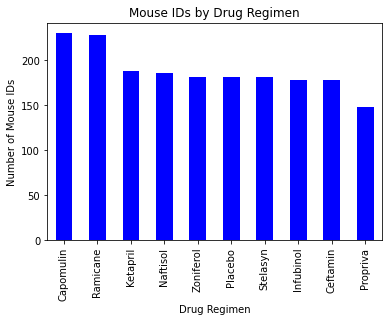

<Figure size 432x288 with 0 Axes>

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_regimen.plot(kind="bar", title="Mouse IDs by Drug Regimen", color = "b", legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse IDs")
plt.show()
plt.tight_layout()


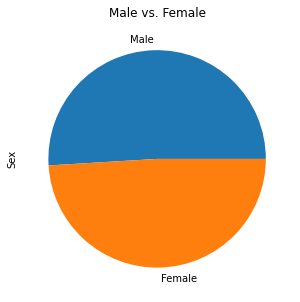

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_sex= clean_mice_df['Sex'].value_counts()
mousie_pie = mouse_sex.plot.pie(y= mouse_sex,figsize=(5,5), title="Male vs. Female")


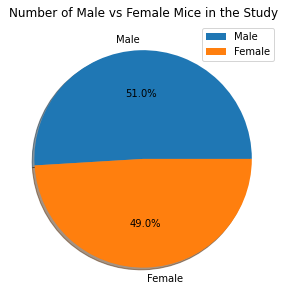

<Figure size 432x288 with 0 Axes>

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex.plot(kind="pie", title="Number of Male vs Female Mice in the Study", legend=True, startangle=0, shadow=True, autopct='%1.1f%%',figsize=(10,5))
plt.ylabel('') 
plt.show()
plt.tight_layout()






## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = clean_mice_df.groupby(["Mouse ID"])["Timepoint"].max()
mouse_df = mouse_df.reset_index()
mouse_df.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newmerge_df = mouse_df.merge(clean_mice_df, on= ["Mouse ID", "Timepoint"], how = "left")
newmerge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = newmerge_df.loc[newmerge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    
    # add subset 
    tumor_vol.append(final_tumor)
    
    
    # Determine outliers using upper and lower bounds
quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The value following is the IQR: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The value following is the IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


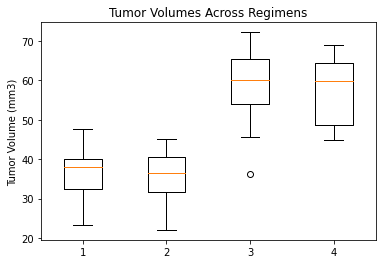

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volumes Across Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

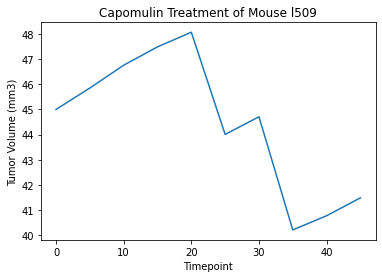

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Capomulin"]
capomulin_mouse = capomulin_table.loc[(clean_mice_df["Mouse ID"]=="l509"),:]
lines = capomulin_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)', legend=False)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

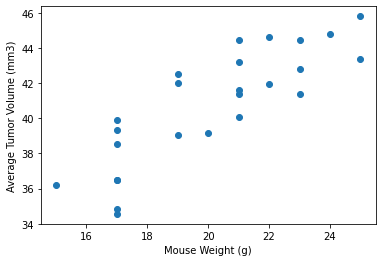

In [86]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Capomulin"]
capomulin_average = capomulin_table.groupby("Mouse ID").mean()
# capomulin_average

plt.scatter(capomulin_average['Weight (g)'],capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_average

weight = capomulin_average.iloc[:,1]
tumor = capomulin_average.iloc[:,3]
correlation = st.pearsonr(weight,tumor)
# print(weight)
# capomulin_average["Weight (g)"]
# capomulin_average
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The correlation between both factors is 0.84


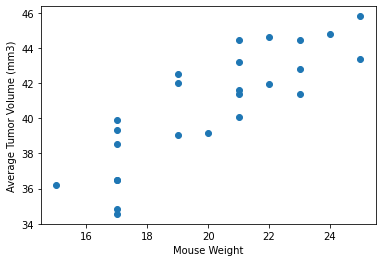

In [88]:
plt.scatter(weight,tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [95]:
# Perform a linear regression on mouse weight vs. average tunor volume
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the figure to a file with name
plt.savefig("Correlation and Regression")

# Show plot
plt.show()

NameError: name 'linregress' is not defined